In [215]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\gnpit\BME574`


In [217]:
Pkg.add(["Random","LinearAlgebra","Plots","Distributions", "FFTW"])

   Resolving package versions...
  No Changes to `C:\Users\gnpit\BME574\Project.toml`
  No Changes to `C:\Users\gnpit\BME574\Manifest.toml`


In [267]:
using FFTW, Plots

In [269]:
dt = 0.001
t = 0:dt:1
f = sin.(2*π*50*t) + sin.(2*π*120*t)
f_noisy = f + 2.5*randn(length(t))

1001-element Vector{Float64}:
  1.875934681644695
  1.5064479201397722
  2.4085808496105514
  2.9456715136874223
  0.8516528752754613
 -0.26632324456248946
  1.0747578782282527
  0.25057046098444063
 -0.5536713245754381
 -4.030272279933614
  2.461880702435338
 -2.5620233313691623
  1.9222191682680976
  ⋮
 -3.263117866181021
  1.2762355307732332
 -5.448239796995718
 -2.4158303404500026
  4.22554665375527
  1.6561761612601664
  2.96194913759713
 -1.0035713501835966
 -6.141141655067766
 -8.178456790870932
 -1.3178698222308476
  0.4296718529932244

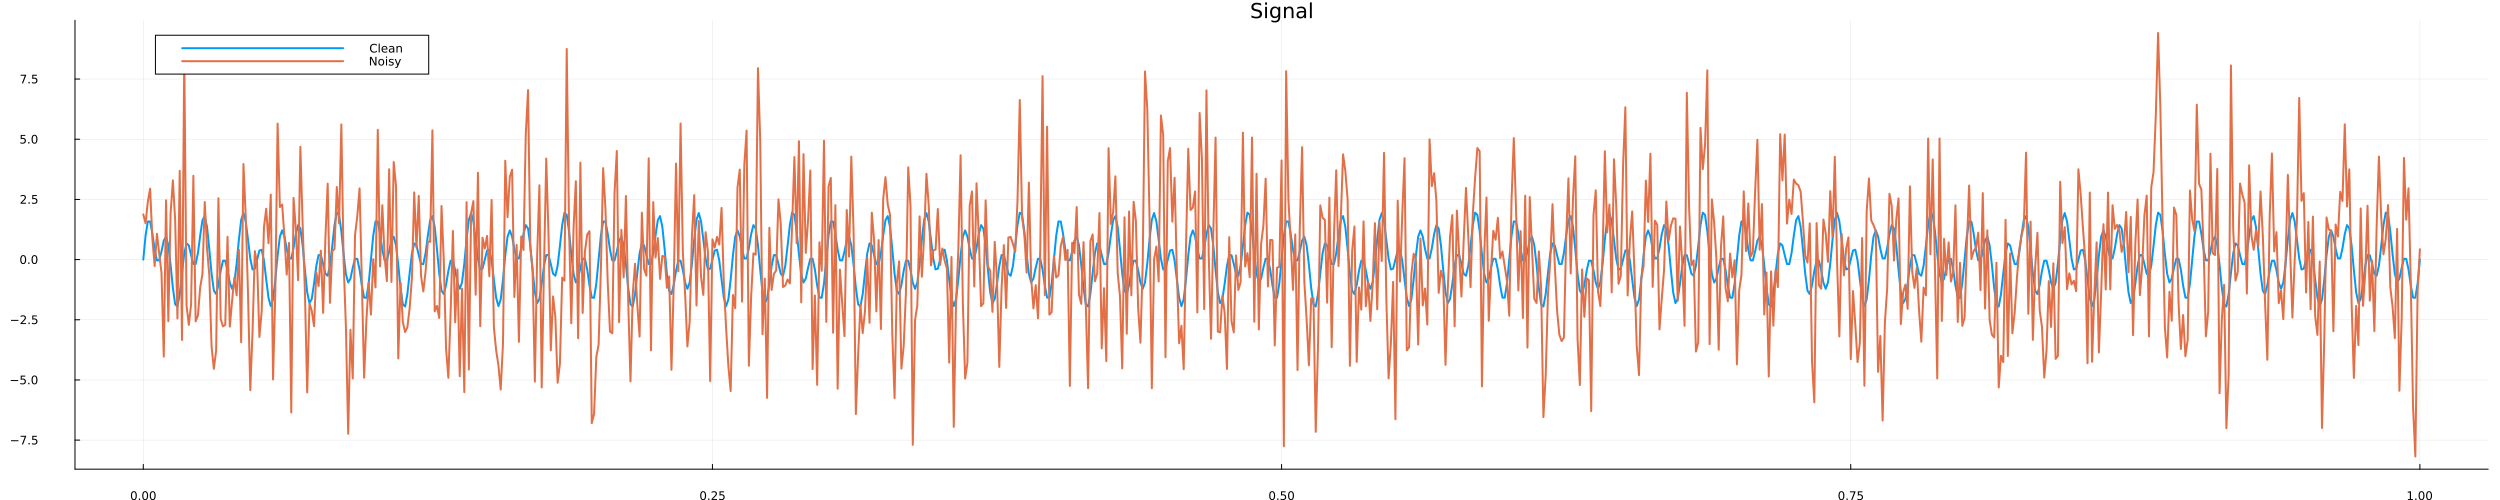

In [351]:
plot(t, f, linewidth=2, label="Clean")
plot!(t, f_noisy, linewidth=2, xlabel="Time (s)", ylabel="Amplitude", label="Noisy", title="Signal", size=(2500,500))

In [325]:
n = length(t)
F = fft(f_noisy) #Calcualte fft
PSD = abs.(F).^2 /n
freq = 1 / (dt*n) * (0:n-1)
L = 1:div(n, 2)

1:500

In [327]:
indices = PSD.>100
PSD_Clean = PSD .* indices
F_Clean = F .* indices
F_filtered = real(ifft(F_Clean))

1001-element Vector{Float64}:
  0.5013310693701225
  1.377287188439259
  1.6936376613520139
  1.4070194276655434
  0.769683263524285
  0.18352413203792867
 -0.02293272640322567
  0.2266124069071952
  0.7184114844663945
  1.0720051881550203
  0.9572377309686682
  0.2864463916284975
 -0.7234800694247635
  ⋮
 -0.18480383711649828
 -0.8012716751004518
 -0.8755342686443951
 -0.5172388094752686
 -0.06604170092828338
  0.10640074626595246
 -0.19002956488219747
 -0.851593793645633
 -1.5312889054141676
 -1.825520157386367
 -1.495961814409515
 -0.6062301399313432

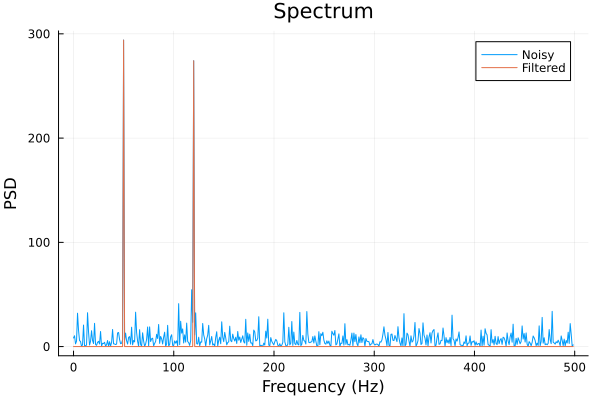

In [333]:
plot(freq[L], PSD[L], title="Spectrum", xlabel="Frequency (Hz)", ylabel="PSD", label="Noisy")
plot!(freq[L], PSD_Clean[L], label="Filtered")

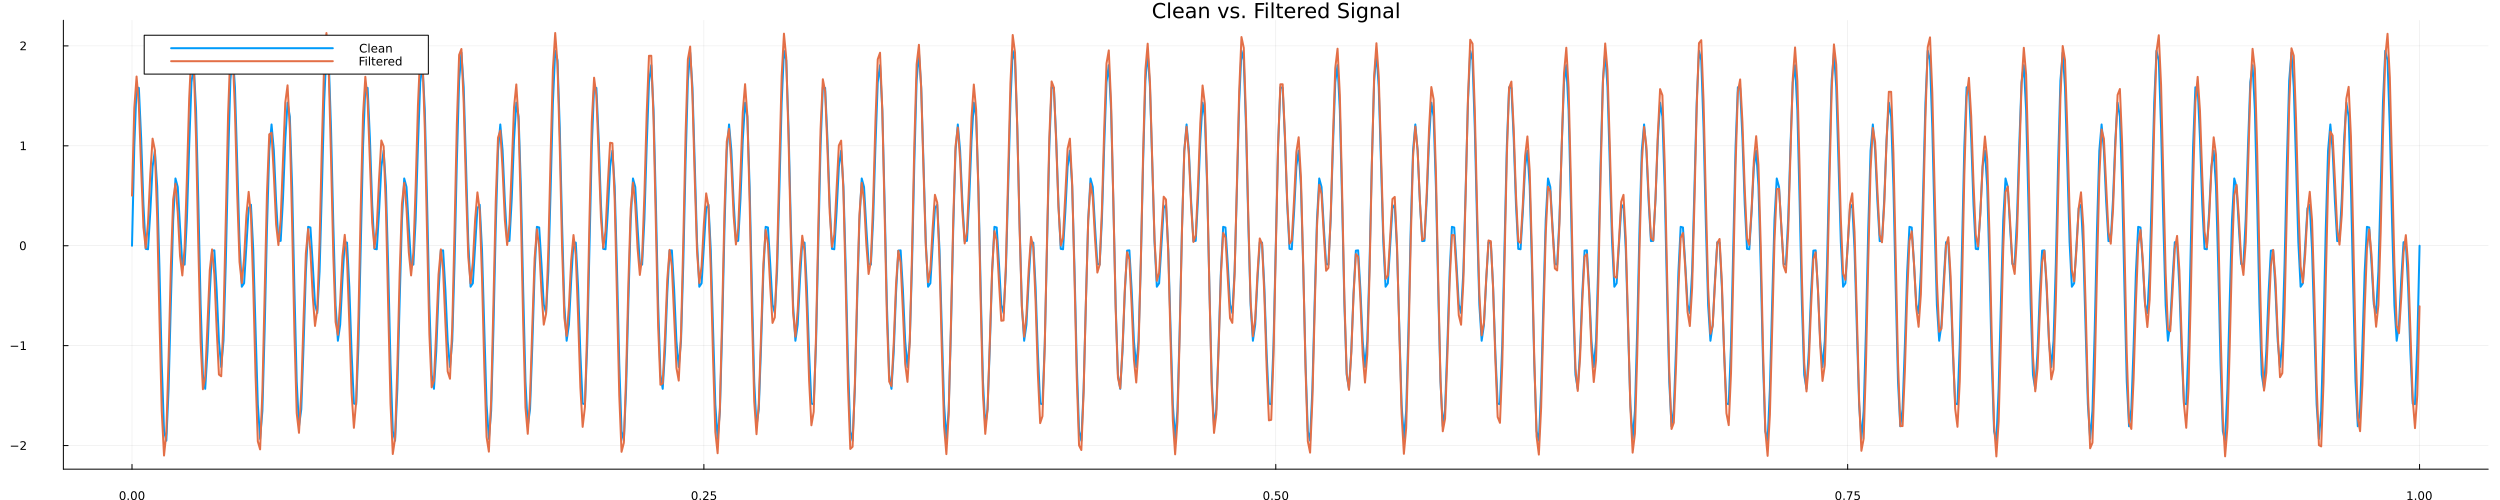

In [345]:
plot(t, f, linewidth=2, label="Clean", size=(2500,500))
plot!(t, F_filtered, linewidth=2, label="Filtered", xlabel="Time (s)", ylabel="f", title="Clean vs. Filtered Signal")